# The Elastic Net

StatTools implements elastic net models (and hence ridge and LASSO regression) by providing the `ElasticNet` estimator class in its `glm` package.
Coefficient estimation is done via coordinate descent.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from stattools.glm import LinearRegression, ElasticNet

In [2]:
# Set NumPy random number generator seed for replicability
np.random.seed(100)

## Load the Boston Housing Data

In [3]:
data = datasets.load_boston()

# Shuffle data
n = len(data.target)
idx = np.random.permutation(n)
x = data.data[idx, :]
y = data.target[idx]

# 50/50 training/testing split
x_train = x[:(n // 2), :]
x_test = x[(n // 2):, :]
y_train = y[:(n // 2)]
y_test = y[(n // 2):]

## Fit a Classical Linear Regression Model

In [4]:
%%time
model = LinearRegression().fit(x_train, y_train)

CPU times: user 1.68 ms, sys: 1.35 ms, total: 3.04 ms
Wall time: 2.56 ms


### Report Mean Squared Error

In [5]:
mse_train = model.mse(x_train, y_train)
mse_test = model.mse(x_test, y_test)
mse_full = model.mse(x, y)
print(f"Training MSE:   {mse_train:.3f}")
print(f"Testing MSE:    {mse_test:.3f}")
print(f"Full data MSE:  {mse_full:.3f}")

Training MSE:   23.630
Testing MSE:    23.131
Full data MSE:  23.381


## Fit a LASSO Model

In [6]:
%%time
model = ElasticNet(alpha=1, lam=0.01)
model.fit(x_train, y_train, verbose=True)

Fitted elastic net (λ: 0.01, α: 1.0) with 253 observations, 13 predictors
	Number of iterations: 34 (tolerance: 0.0001)
	Final (standardized) elastic net loss: 0.15511
CPU times: user 20.9 ms, sys: 7.23 ms, total: 28.1 ms
Wall time: 27.6 ms


### Report Mean Squared Error

In [7]:
mse_train = model.mse(x_train, y_train)
mse_test = model.mse(x_test, y_test)
mse_full = model.mse(x, y)
print(f"Training MSE:   {mse_train:.3f}")
print(f"Testing MSE:    {mse_test:.3f}")
print(f"Full data MSE:  {mse_full:.3f}")

Training MSE:   24.201
Testing MSE:    22.011
Full data MSE:  23.106


## Regularization Path

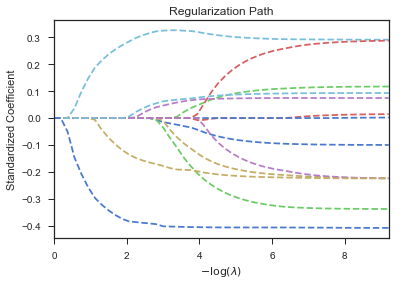

In [8]:
lam_min = 0.0001
lam_max = 1

plt.figure()
model.path_plot(x, y, lam_min, lam_max, ls="--")
plt.show()
plt.close()

## References

* Zou Hui, Trevor Hastie.
  "Regularization and Variable Selection via the Elastic Net".
  Journal of the Royal Statistical Society, Series B. Vol. 67, No. 2, 2005, pp. 301–320.
  ([DOI](https://doi.org/10.1111/j.1467-9868.2005.00503.x))
* Jerome Friedman, Trevor Hastie, and Robert Tibshirani.
  "Regularization Paths for Generalized Linear Models via Coordinate Descent".
  Journal of Statistical Software Vol. 33, No. 1, 2010, pp. 1–22.
  ([PMCID](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2929880/))